In [2]:
import pandas as pd

In [52]:
train=pd.read_csv("./Dataset/titanic_train.csv")

In [4]:
train.shape

(891, 12)

In [51]:
train

,PassengerId,Survived,Pclass,SibSp,Parch,Fare,Embarked,Age
0,1,0,0,1,0,7.2500,S,22.0
1,2,1,0,1,0,71.2833,C,38.0
2,3,1,0,0,0,7.9250,S,26.0
3,4,1,0,1,0,53.1000,S,35.0
4,5,0,0,0,0,8.0500,S,35.0
...,...,...,...,...,...,...,...,...
886,887,0,1,0,0,13.0000,S,27.0
887,888,1,0,0,0,30.0000,S,19.0
888,889,0,0,1,2,23.4500,S,25.0
889,890,1,0,0,0,30.0000,C,26.0


In [6]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [7]:
#created sex to dummy variable and removed 1 column to avoid dummy variable trap
sex=pd.get_dummies(train['Sex'],drop_first=True)

In [8]:
from seaborn import heatmap

In [9]:
heatmap(train)

ValueError: could not convert string to float: 'Braund, Mr. Owen Harris'

<AxesSubplot:>

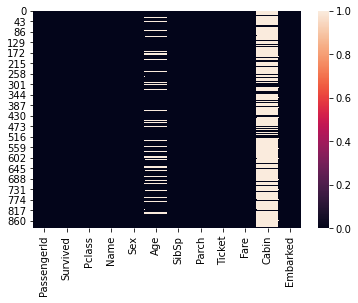

In [10]:
heatmap(train.isnull())

In [11]:
train=train.drop('Cabin',axis=1)

In [12]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [13]:
train=train.drop(labels="Name",axis=1)

In [14]:
train=train.drop("Ticket",axis=1)

In [15]:
train=train.drop("Sex",axis=1)

In [16]:
def age(pclass):
    pc=pclass[0]
    #print(pclass)
    Age=pclass[1]    
    if pd.isnull(Age):
        if pc==1:
            return 38  #took age by using excel
        if pc==2:
            return 30
        if pc==3:
            return 25
        else:
            return 30
    else:
        return Age

In [17]:
age=train[['Pclass','Age']].apply(age,axis=1)

In [18]:
age

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    25.0
889    26.0
890    32.0
Length: 891, dtype: float64

In [19]:
train=train.drop('Age',axis=1)

In [20]:
train['Age']=age

In [21]:
train

,PassengerId,Survived,Pclass,SibSp,Parch,Fare,Embarked,Age
0,1,0,3,1,0,7.2500,S,22.0
1,2,1,1,1,0,71.2833,C,38.0
2,3,1,3,0,0,7.9250,S,26.0
3,4,1,1,1,0,53.1000,S,35.0
4,5,0,3,0,0,8.0500,S,35.0
...,...,...,...,...,...,...,...,...
886,887,0,2,0,0,13.0000,S,27.0
887,888,1,1,0,0,30.0000,S,19.0
888,889,0,3,1,2,23.4500,S,25.0
889,890,1,1,0,0,30.0000,C,26.0


In [22]:
pclass_dummy=pd.get_dummies(train['Pclass'],drop_first=True)

In [23]:
pclass_dummy

,2,3
0,0,1
1,0,0
2,0,1
3,0,0
4,0,1
...,...,...
886,1,0
887,0,0
888,0,1
889,0,0


In [24]:
train['Pclass']=pclass_dummy

In [25]:
sibling=pd.get_dummies(train['SibSp'],drop_first=True)

In [26]:
sibling

,1,2,3,4,5,8
0,1,0,0,0,0,0
1,1,0,0,0,0,0
2,0,0,0,0,0,0
3,1,0,0,0,0,0
4,0,0,0,0,0,0
...,...,...,...,...,...,...
886,0,0,0,0,0,0
887,0,0,0,0,0,0
888,1,0,0,0,0,0
889,0,0,0,0,0,0


In [27]:
dataset_final=pd.concat([sibling,pclass_dummy,age,sex])

In [28]:
from sklearn.linear_model import LogisticRegression

In [29]:
model=LogisticRegression

In [30]:
y=train['Survived']

In [31]:
type(y)

pandas.core.series.Series

In [32]:
model.fit(dataset_final,y)

TypeError: fit() missing 1 required positional argument: 'y'

In [33]:
dataset_final=dataset_final.values
y=y.values

In [34]:
model.fit(dataset_final,y)

TypeError: fit() missing 1 required positional argument: 'y'

In [35]:
y=y.reshape(-1,1)
y

array([[0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
    

In [36]:
dataset_final=dataset_final.reshape(-1,1)
dataset_final

array([[nan],
       [ 1.],
       [ 0.],
       ...,
       [nan],
       [nan],
       [ 1.]])

<AxesSubplot:>

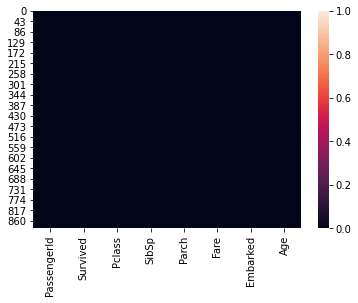

In [37]:
heatmap(train.isnull())

In [38]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Lasso

In [39]:
feature=SelectFromModel(Lasso(0.1))

In [40]:

(pd.get_dummies(train['Sex'],drop_first=True))

KeyError: 'Sex'

In [41]:
feature.fit(train.drop('Survived',axis=1),train["Survived"])

ValueError: could not convert string to float: 'S'

In [1]:
!conda list

# packages in environment at C:\Users\alfo7\anaconda3:
#
# Name                    Version                   Build  Channel
_ipyw_jlab_nb_ext_conf    0.1.0                    py38_0  
absl-py                   0.13.0                   pypi_0    pypi
alabaster                 0.7.12             pyhd3eb1b0_0  
anaconda                  2021.05                  py38_0  
anaconda-client           1.7.2                    py38_0  
anaconda-navigator        2.0.3                    py38_0  
anaconda-project          0.9.1              pyhd3eb1b0_1  
anyio                     2.2.0            py38haa95532_2  
appdirs                   1.4.4                      py_0  
argh                      0.26.2                   py38_0  
argon2-cffi               20.1.0           py38h2bbff1b_1  
asn1crypto                1.4.0                      py_0  
astroid                   2.5              py38haa95532_1  
astropy                   4.2.1            py38h2bbff1b_1  
astunparse                1.6.

nbconvert                 6.0.7                    py38_0  
nbformat                  5.1.3              pyhd3eb1b0_0  
nest-asyncio              1.5.1              pyhd3eb1b0_0  
networkx                  2.5                        py_0  
nltk                      3.6.1              pyhd3eb1b0_0  
nose                      1.3.7           pyhd3eb1b0_1006  
notebook                  6.3.0            py38haa95532_0  
numba                     0.53.1           py38hf11a4ad_0  
numexpr                   2.7.3            py38hb80d3ca_1  
numpy                     1.18.5                   pypi_0    pypi
numpydoc                  1.1.0              pyhd3eb1b0_1  
oauthlib                  3.1.1                    pypi_0    pypi
olefile                   0.46                       py_0  
openjpeg                  2.3.0                h5ec785f_1  
openpyxl                  3.0.7              pyhd3eb1b0_0  
openssl                   1.1.1k               h2bbff1b_0  
opt-einsum                3.

In [42]:
import seaborn as sns

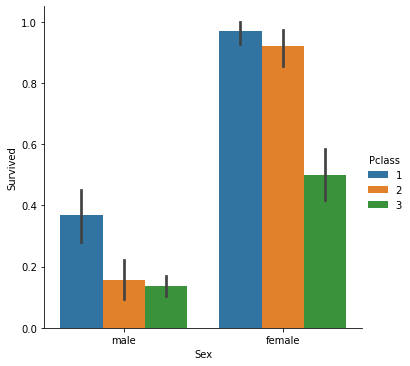

In [105]:
sns.catplot(y='Survived',x='Sex',data=train,hue='Pclass',kind='bar')

In [91]:
train['Pclass'].unique()

array([3, 1, 2], dtype=int64)

<AxesSubplot:xlabel='Survived', ylabel='count'>

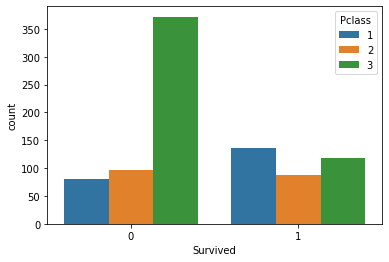

In [59]:
sns.countplot(x='Survived',hue=train['Pclass'],data=train)

In [77]:
sns.heatmap(train['Pclass'].isnull())

IndexError: Inconsistent shape between the condition and the input (got (891, 1) and (891,))

In [89]:
%config Completer.use_jedi = False

In [87]:
sns.heatmap(train['Pclass']

IndexError: Inconsistent shape between the condition and the input (got (891, 1) and (891,))